<a href="https://colab.research.google.com/github/Carla-if/Probabilidad/blob/main/Unidad%206/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Probabilidad y estadística**

## Unidad 6

### Proyecto Final

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Integrantes del equipo:
### * Carla Iberia Carrillo Ferrer
### * Mauricio Leos Lazcano

### Grupo: 2Y

### Agosto-Diciembre 2025

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargamos el archivo desde drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Usamos file_path para dar la direccion exacta del archivo
file_path = ('/content/drive/MyDrive/Proyecto/Covid.csv')
DF = pd.read_csv(file_path, low_memory=False)

In [6]:
# Tomamos los primeros datos
DF.head()

,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,...,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_ANTIGENO,UCI
0,Issste,Femenino,San Luis Potosí,Ambulatorio,2020-12-06,9999-99-99,No aplica,No,55,No,...,Si,No,No,No,No,No,No,No,Pendiente,No aplica
1,Issste,Masculino,San Luis Potosí,Ambulatorio,2020-02-20,9999-99-99,No aplica,No,59,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
2,Ssa,Femenino,Jalisco,Ambulatorio,2020-04-22,9999-99-99,No aplica,No,42,No,...,No,No,Si,No,No,No,No,No,Pendiente,No aplica
3,Ssa,Masculino,Chihuahua,Ambulatorio,2020-07-28,9999-99-99,No aplica,No,35,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
4,Ssa,Masculino,Ciudad De México,Ambulatorio,2020-08-18,9999-99-99,No aplica,No,51,No aplica,...,No,No,No,Si,No,No,No,No,Pendiente,No aplica


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12634194 entries, 0 to 12634193
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   SECTOR              object
 1   SEXO                object
 2   ENTIDAD_NAC         object
 3   TIPO_PACIENTE       object
 4   FECHA_INGRESO       object
 5   FECHA_DEF           object
 6   INTUBADO            object
 7   NEUMONIA            object
 8   EDAD                int64 
 9   EMBARAZO            object
 10  INDIGENA            object
 11  DIABETES            object
 12  EPOC                object
 13  ASMA                object
 14  HIPERTENSION        object
 15  CARDIOVASCULAR      object
 16  OBESIDAD            object
 17  RENAL_CRONICA       object
 18  TABAQUISMO          object
 19  RESULTADO_ANTIGENO  object
 20  UCI                 object
dtypes: int64(1), object(20)
memory usage: 2.0+ GB


In [8]:
# Estadisticas descriptivas
print("** Estadisticas Descriptivas **")
print("--Numero de casos--")
Conteo_casos= DF["RESULTADO_ANTIGENO"].value_counts()
print(Conteo_casos)

print("\n--Numero de pacientes--")
Conteo_pacientes= DF["TIPO_PACIENTE"].value_counts()
print(Conteo_pacientes)

print("\n--Pacientes embarazadas--")
Conteo_embarazadas= DF["EMBARAZO"].value_counts()
print(Conteo_embarazadas)

print("\n--Pacientes indigenas")
Conteo_indigenas= DF["INDIGENA"].value_counts()
print(Conteo_indigenas)

** Estadisticas Descriptivas **
--Numero de casos--
RESULTADO_ANTIGENO
Negativo     5853547
Pendiente    5005939
Positivo     1774708
Name: count, dtype: int64

--Numero de pacientes--
TIPO_PACIENTE
Ambulatorio      11543303
Hospitalizado     1090891
Name: count, dtype: int64

--Pacientes embarazadas--
EMBARAZO
No                 6483614
No aplica          5985456
Si                  122583
Se ignora            42529
No especificado         12
Name: count, dtype: int64

--Pacientes indigenas
INDIGENA
No                 3665974
No especificado     167182
Si                   35240
Name: count, dtype: int64


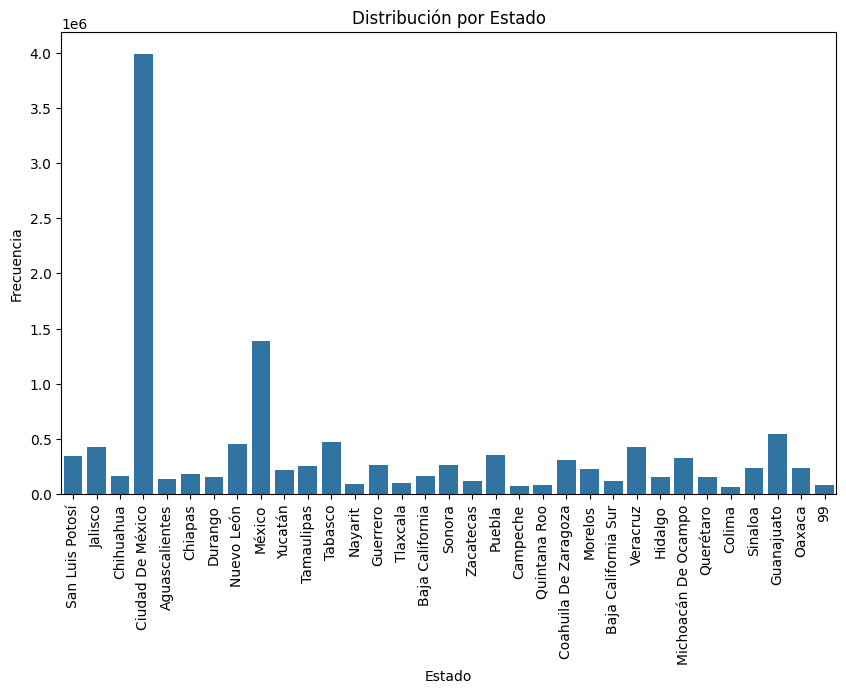

In [9]:
# Visualizaciones
# Grafico de barras por estado
plt.figure(figsize=(10, 6))
sns.countplot(x='ENTIDAD_NAC', data=DF)
plt.title('Distribución por Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

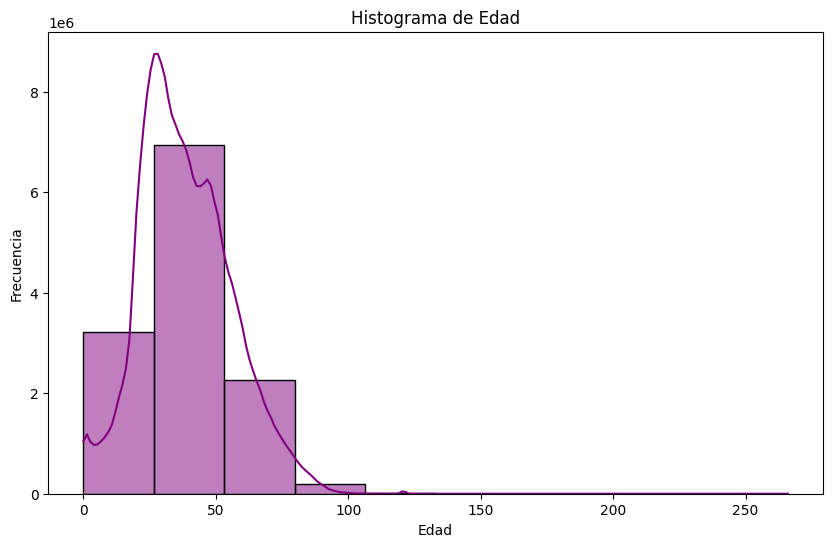

In [31]:
# Histograma por edad
plt.figure(figsize=(10, 6))
sns.histplot(DF['EDAD'], bins=20, kde=True, color='purple')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

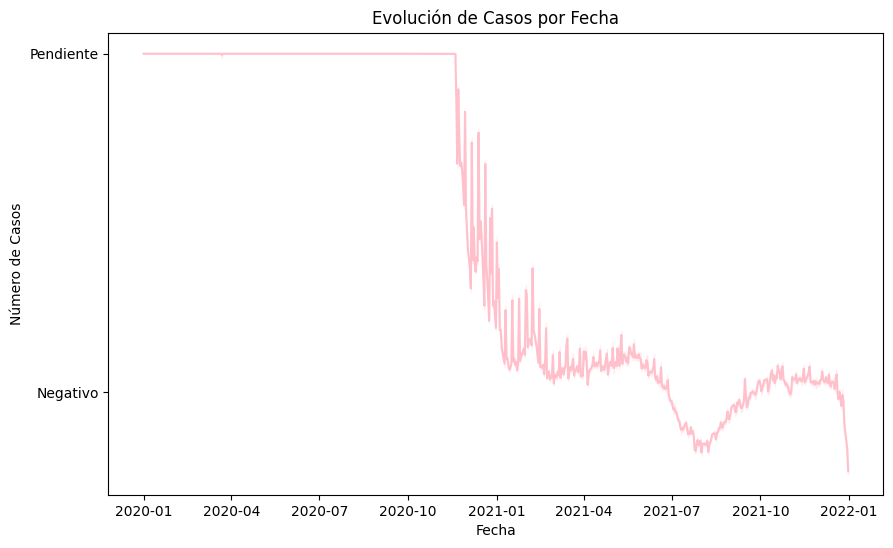

In [11]:
# Convertimos la fecha de ingreso, para poder graficarla
DF['FECHA_INGRESO'] = pd.to_datetime(DF['FECHA_INGRESO'])
# Grafico de lineas por fechas para mostrar la evolucion de los casos
plt.figure(figsize=(10, 6))
sns.lineplot(x='FECHA_INGRESO', y='RESULTADO_ANTIGENO', color='pink', data=DF)
plt.title('Evolución de Casos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.show()

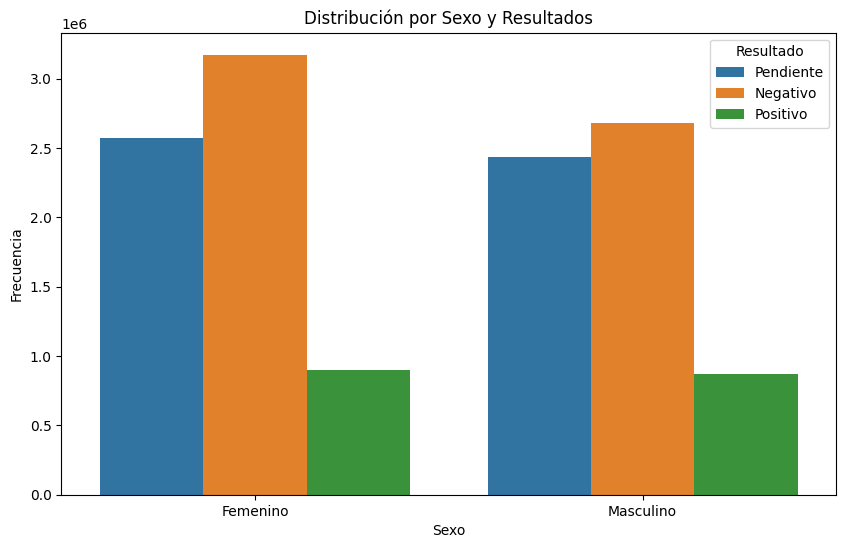

In [12]:
# Grafico de barras apiladas por sexo y resultados

plt.figure(figsize=(10, 6))
sns.countplot(x='SEXO', hue='RESULTADO_ANTIGENO', data=DF)
plt.title('Distribución por Sexo y Resultados')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.legend(title='Resultado', loc='upper right')
plt.show()

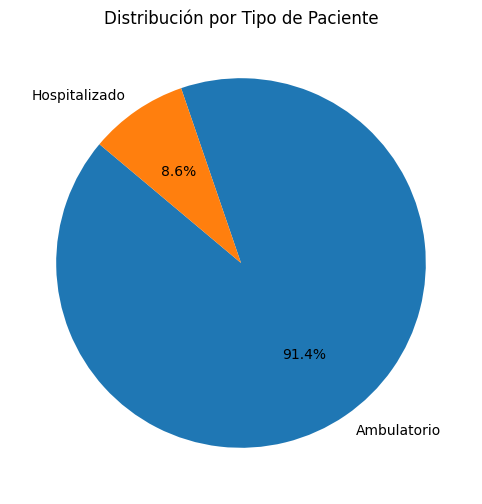

In [13]:
# Grafico circular por tipo de paciente
plt.figure(figsize=(10, 6))
plt.pie(Conteo_pacientes, labels=Conteo_pacientes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Tipo de Paciente')
plt.show()

/tmp/ipython-input-1008820234.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Comorbilidad', y='Conteo', data=DF_comorbilidad, palette='viridis')


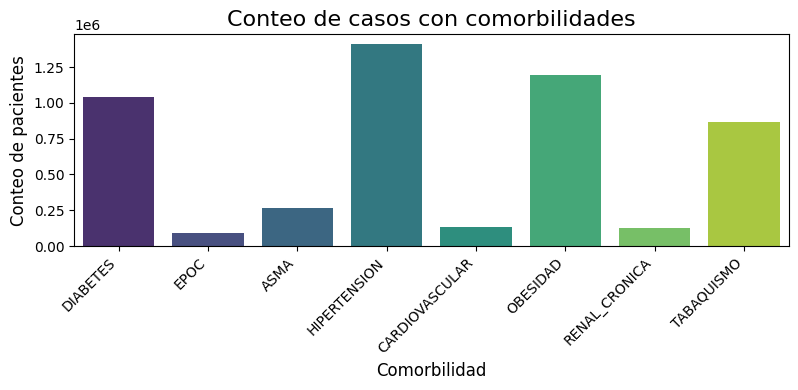

In [22]:
# Grafico de barras por comorbilidad
columnas_comorbilidad = ['DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
contador = {}
# Utilizamo el ciclo for para saber cuantas personas tienen dicha comorbilidad y que tan recurrente es
for col in columnas_comorbilidad:
    if col in DF.columns:
        cont_si = DF[col].value_counts().get('Si', 0)
        contador[col] = cont_si

DF_comorbilidad = pd.DataFrame(list(contador.items()), columns=['Comorbilidad', 'Conteo'])

plt.figure(figsize=(8, 4))
sns.barplot(x='Comorbilidad', y='Conteo', data=DF_comorbilidad, palette='viridis')
plt.title('Conteo de casos con comorbilidades', fontsize=16)
plt.ylabel('Conteo de pacientes', fontsize=12)
plt.xlabel('Comorbilidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Probabilidades por Comornilidad e interpretacion estadistica
comorbilidades = ['DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
total_casos = len(DF)
print(f"PROBABILIDADES POR COMORBILIDAD (N={total_casos} casos)")


# DataFrame para almacenar los resultados del conteo y la probabilidad
probabilidades = pd.DataFrame(index=['Conteo (Valor Si)', 'Probabilidad (%)'])

for com in comorbilidades:
    # Cuenta cuántos registros tienen el valor 'Si' para esta comorbilidad
    conteo = DF[com].eq('Si').sum()

    # Sacamos la probabilidad y multiplicamos por 100 para tener el porcentaje
    probabilidad = (conteo / total_casos) * 100

    # Almacenar en el DataFrame de resultados
    probabilidades[com] = [conteo, probabilidad]

# Tabla de resultados
print("Probabilidad de que un caso elegido al azar tenga la condición:")
tabla_final =probabilidades.T.sort_values(by='Probabilidad (%)', ascending=False)
print(tabla_final.to_string(float_format='%.4f'))

PROBABILIDADES POR COMORBILIDAD (N=12634194 casos)
Probabilidad de que un caso elegido al azar tenga la condición:
                Conteo (Valor Si)  Probabilidad (%)
HIPERTENSION         1407779.0000           11.1426
OBESIDAD             1193021.0000            9.4428
DIABETES             1038459.0000            8.2194
TABAQUISMO            865162.0000            6.8478
ASMA                  263855.0000            2.0884
CARDIOVASCULAR        134410.0000            1.0639
RENAL_CRONICA         129874.0000            1.0280
EPOC                   92446.0000            0.7317


In [30]:
# Ejercicio de distribucion normal
media = 2360
desv_est = 714

# Calcular la probabilidad para cada uno
p1 = (2000 - media) / desv_est
p2 = (3000 - media) / desv_est

# Calcular la probabilidad acumulada
prob_acumulada1 = stats.norm.cdf(p1, loc=media, scale=desv_est)
prob_acumulada2 = stats.norm.cdf(p2, loc=media, scale=desv_est)
# Probabilidades acumuladas
print(prob_acumulada1)
print(prob_acumulada2)

# Calcular la probabilidad como la diferencia entre las probabilidades acumuladas
probabilidad = prob_acumulada2 - prob_acumulada1

print(f"Media: {media} | Desviacion Estandar: {desv_est}")
print(f"La probabiidad de tener entre 2000 y 3000 casos es: {probabilidad:.4f}")

0.0004731426592711047
0.0004764657438810643
Media: 2360 | Desviacion Estandar: 714
La probabiidad de tener entre 2000 y 3000 casos es: 0.0000


### Con este proyecto pudimos observar que hubo tendencias criticas mientras se iba distribuyendo la enfermedad, los factores de riesgo aumentaban y la serieded de los casos.

#### Podemos observar en el grafico de lineas que en las primeras fechas fue en donde hubo mas contagios y conforme pasaba los meses esta iba disminuyendo. En la distribucion de Estado podemos observar que la Ciudad de mexico fue la mas afectada con mas casos positivos de esta enfermedad.

#### En la distribucion de tipo de pacientes podemos observar que hubo un 91.4% de la poblacion que no tuvo que ser hospitalizada ya que su prueba salia negativa o positiva, si esta salia positava el paciente podria ir a su casa si no presentaba ningun riesgo mayor, tambien se puede observar con la grafica de la edad que las personas que mas ingresaron fue de entre 30 y 60 años.

### Conclusiones

##### Esta materia nos parecio didactica ya que utilizamos python para realizar los trabajos y gracias a eso observamos como funciona la probabilidad y estadistica en diferentes ambitos, tambien nos ayudo a aprender cosas nuevas para la programacion.

##### Con este proyecto pudimos plasmar todo lo que aprendimos en la materia ya sea con el codigo o tambien con las formulas para hacer los diferentes calculos, de igual manera pudimos analizar las graficas que se presentaron asi como los datos mostrados para hacer este proyecto.

##### De esta materia nos llevamos el uso de python para la probabilidad y estadistica y el aprendizaje de un nuevo metodo para teer la informacion mas ordenada y clara, tambien aprendimos cosas nuevas como las diferentes distribuciones, las distintas variables y algunas instrucciones que no conociamos de esta plataforma.